In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.datasets import load_wine
data = load_wine()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target_names[data.target]

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [3]:
df.shape

(178, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
features= df.iloc[:, : -1]
predictions= df.iloc[:, -1]
# print(features.head())
# print(predictions
features.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
predictions.head()

0    class_0
1    class_0
2    class_0
3    class_0
4    class_0
Name: target, dtype: object

In [7]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
feature_scaled= scaler.fit_transform(features)
feature_scaled= pd.DataFrame(feature_scaled, columns= features.columns)
feature_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_scaled, predictions, test_size=0.2, random_state=0, shuffle=True)

In [86]:
Train_data= pd.concat([X_train, y_train], axis= 'columns')
Train_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
161,0.851569,0.829128,0.634140,0.151661,0.509638,-0.745264,-1.475098,1.113154,-1.385721,0.355534,0.011190,-1.118210,-0.213021,class_2
92,-0.383696,-0.723829,-0.389355,0.361860,-1.386122,-1.466313,-0.571528,1.757779,0.050988,-0.868639,0.011190,-0.779224,-0.802153,class_1
94,-1.705429,-0.310904,-0.316249,-0.448909,-0.122282,1.161510,0.231646,-1.545922,-0.422075,-0.782125,0.888658,0.491974,-1.279827,class_1
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,class_2
24,0.616869,-0.472483,0.890014,0.151661,-0.262708,0.376368,0.583034,-0.659563,0.121071,-0.665332,0.713164,1.706675,0.312420,class_0


In [87]:
Train_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,-0.019466,0.032547,0.001406,0.018013,0.022595,-0.058406,-0.080433,0.013434,0.026557,-0.005571,-0.017976,-0.035901,-0.014529
std,0.997075,1.001218,0.985786,1.033746,1.000481,0.980132,0.979792,1.029052,1.035868,1.029695,1.008725,1.020691,0.967401
min,-2.434235,-1.432983,-3.679162,-2.671018,-2.088255,-1.914966,-1.565455,-1.868234,-2.051513,-1.634288,-1.831492,-1.895054,-1.454974
25%,-0.806774,-0.658749,-0.526431,-0.674123,-0.754202,-0.945556,-0.995704,-0.740141,-0.610424,-0.845929,-0.778531,-1.040526,-0.750404
50%,0.048647,-0.396182,-0.023821,0.001518,-0.122282,-0.136378,0.005753,-0.176095,-0.062898,-0.198156,0.011190,0.209486,-0.228944
75%,0.786718,0.795466,0.707247,0.602088,0.492085,0.704846,0.733629,0.710264,0.642316,0.526399,0.713164,0.785056,0.591860
max,2.160950,2.974543,3.119772,3.154511,4.371372,2.539515,1.717516,2.402403,3.485073,3.435432,3.301694,1.960915,2.547935


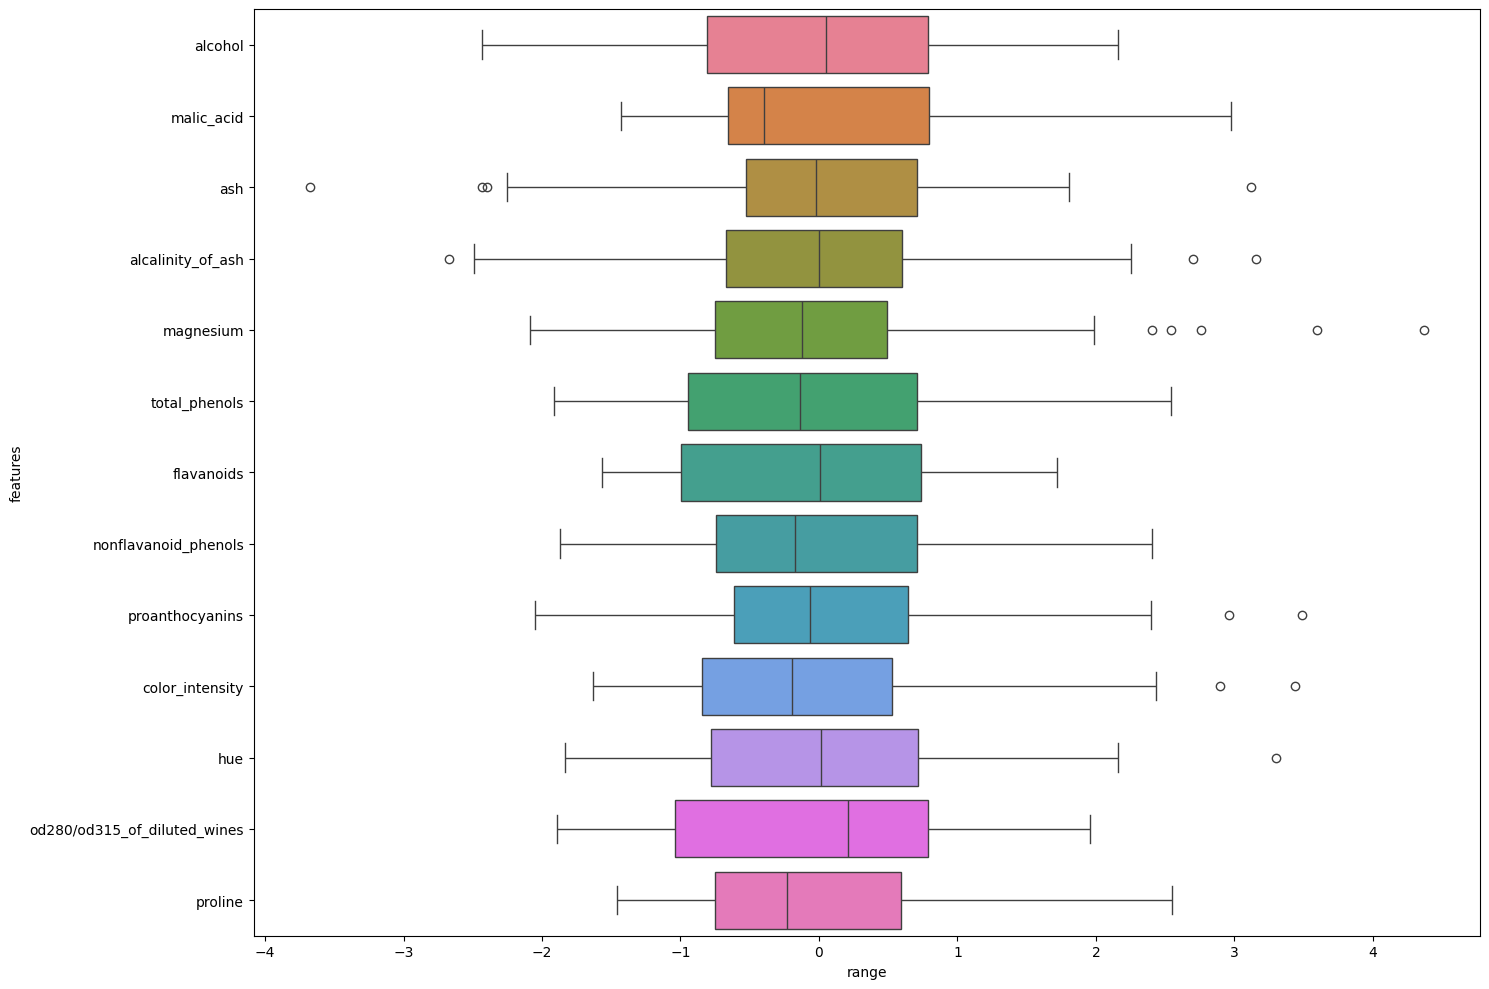

In [88]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X_train, orient="h").set(xlabel= 'range', ylabel='features')
plt.tight_layout()

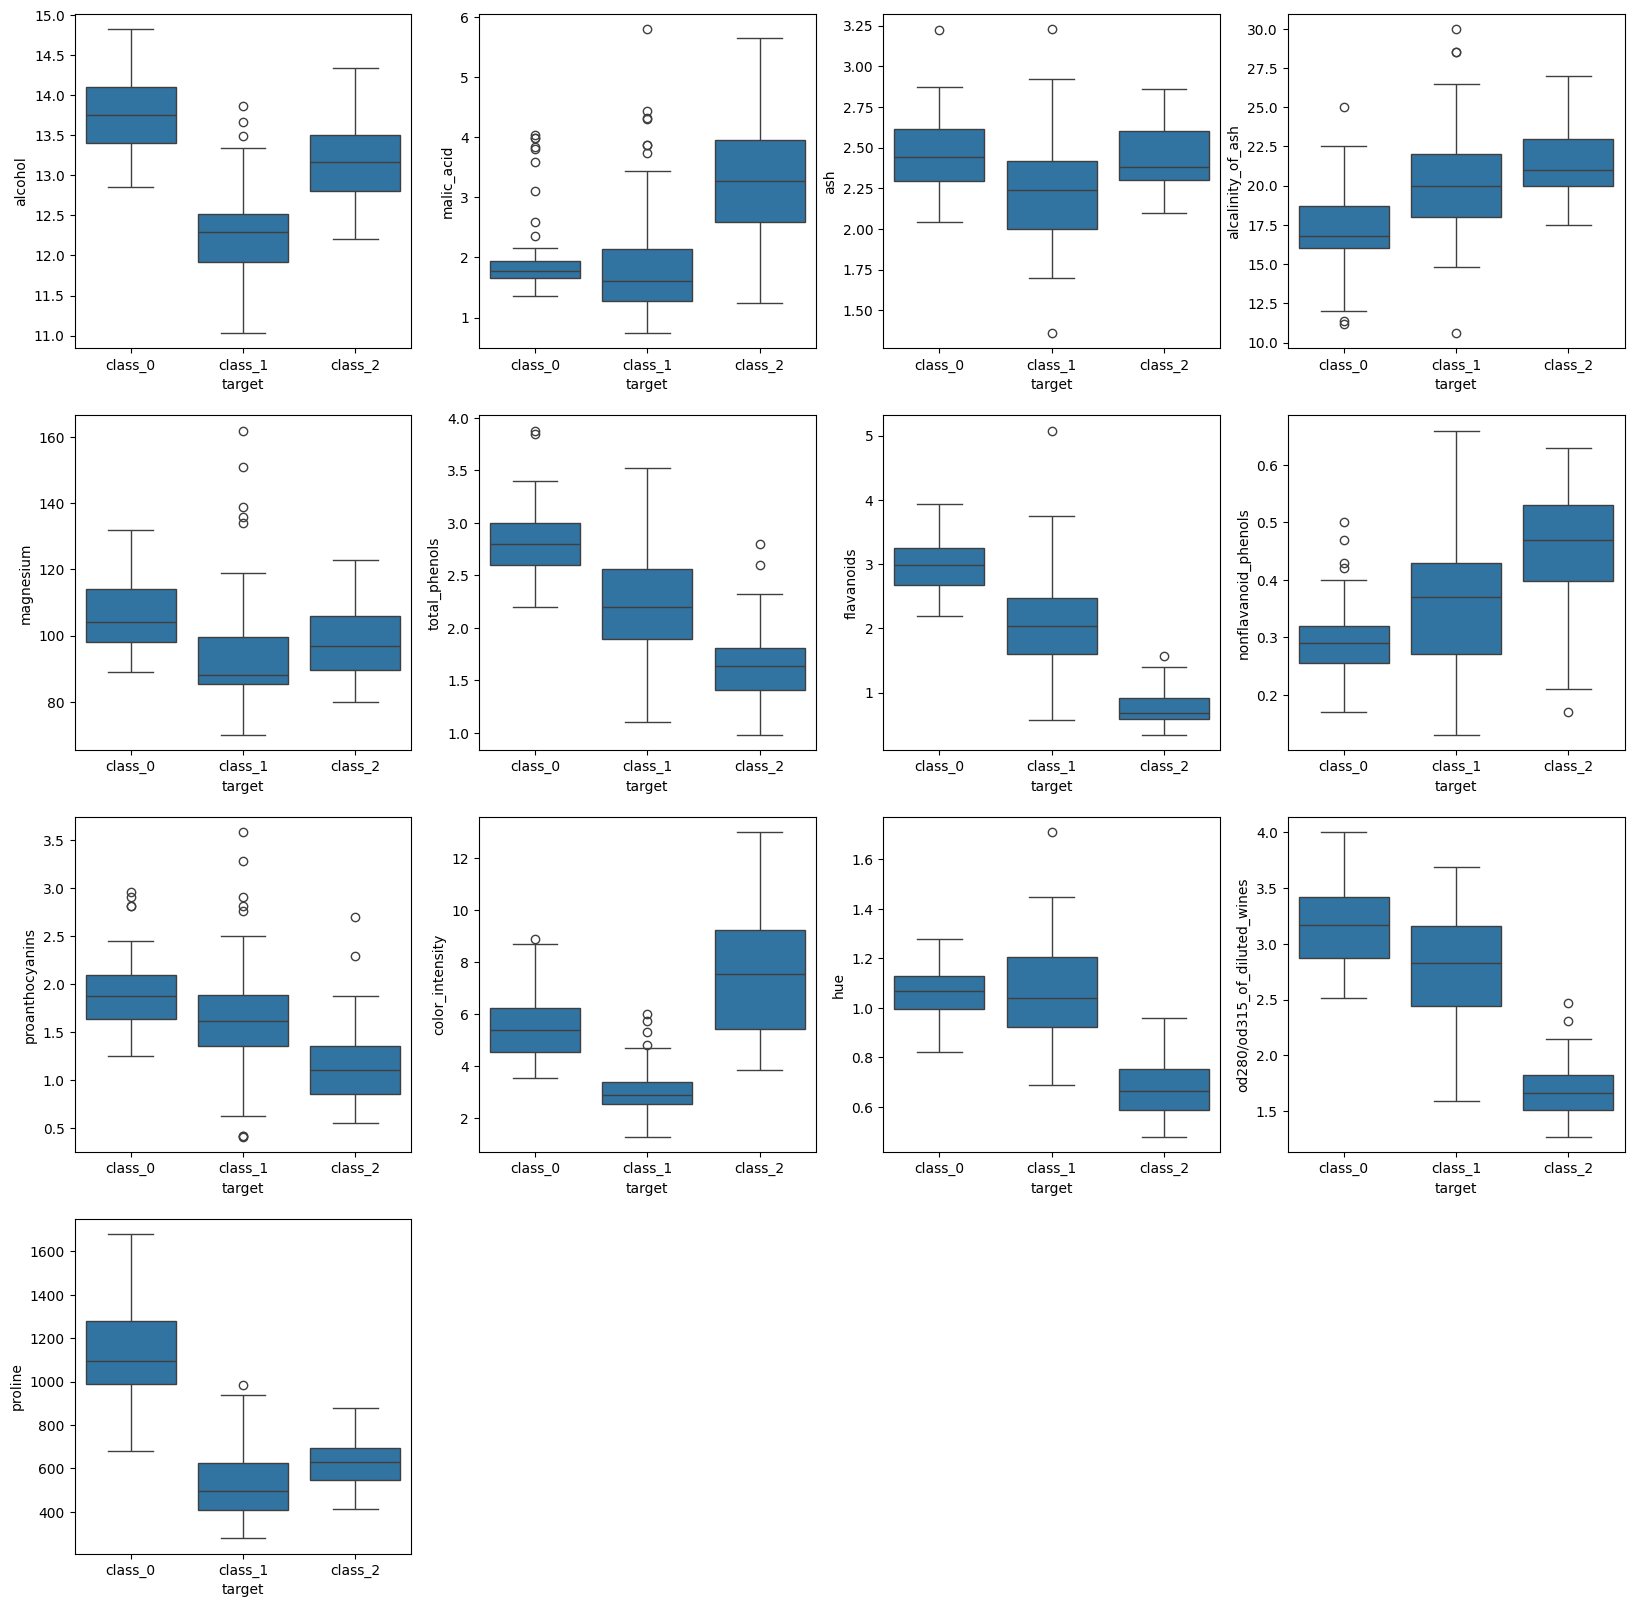

In [89]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    if i < 13:
        sns.boxplot(data=df, x='target', y=df.columns[i], ax=ax)
    else:
        ax.set_visible(False)
plt.show()

In [90]:

Train_data = Train_data.drop('target', axis=1)
corr_mat = Train_data.corr(method='pearson')
corr_mat

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.100874,0.266207,-0.273232,0.235365,0.314484,0.276553,-0.100155,0.129632,0.566025,-0.067541,0.057073,0.619813
malic_acid,0.100874,1.000000,0.173466,0.266779,-0.031623,-0.322541,-0.417179,0.330698,-0.219270,0.302503,-0.541480,-0.391111,-0.186186
ash,0.266207,0.173466,1.000000,0.445968,0.201369,0.160595,0.093388,0.158221,0.017448,0.261122,-0.094603,-0.011545,0.190943
alcalinity_of_ash,-0.273232,0.266779,0.445968,1.000000,-0.100902,-0.325718,-0.399852,0.386218,-0.215529,0.012670,-0.252494,-0.298203,-0.432653
magnesium,0.235365,-0.031623,0.201369,-0.100902,1.000000,0.182268,0.165807,-0.310549,0.260233,0.151305,0.042404,0.029867,0.339024
total_phenols,0.314484,-0.322541,0.160595,-0.325718,0.182268,1.000000,0.858048,-0.454415,0.622975,-0.062106,0.452515,0.709367,0.528110
flavanoids,0.276553,-0.417179,0.093388,-0.399852,0.165807,0.858048,1.000000,-0.576292,0.662524,-0.204740,0.587220,0.797165,0.539812
nonflavanoid_phenols,-0.100155,0.330698,0.158221,0.386218,-0.310549,-0.454415,-0.576292,1.000000,-0.323831,0.192717,-0.328522,-0.509848,-0.330599
proanthocyanins,0.129632,-0.219270,0.017448,-0.215529,0.260233,0.622975,0.662524,-0.323831,1.000000,-0.031313,0.310292,0.505636,0.352720
color_intensity,0.566025,0.302503,0.261122,0.012670,0.151305,-0.062106,-0.204740,0.192717,-0.031313,1.000000,-0.545881,-0.453062,0.309687


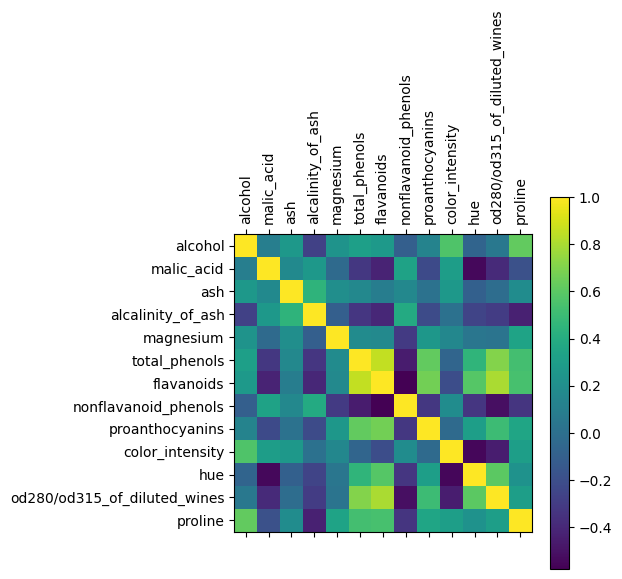

In [91]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

In [92]:
Train_data.drop(['flavanoids'], axis=1, inplace=True)
X_train.drop(['flavanoids'], axis=1, inplace=True)
X_test.drop(['flavanoids'], axis=1, inplace=True)

In [93]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() 
model.fit(X_train, y_train) 
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [94]:
from sklearn.metrics import f1_score, confusion_matrix

F1_train = f1_score(y_train, y_pred_train, average='weighted')
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train F1 score: ", np.round(F1_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

F1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test F1 score: ", np.round(F1, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train F1 score:  0.986
Train confusion matrix: 
 [[44  1  0]
 [ 0 54  1]
 [ 0  0 42]]
Test F1 score:  0.973
Test confusion matrix: 
 [[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]
